In [105]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 18

In [180]:

def read_positions(filename,N):
    data= np.loadtxt(filename)
    X = data[:,0]
    Y = data[:,1]
    Xp = data[:,2]
    Yp = data[:,3]
    Steps = len(X) //N 
    X = np.reshape(X,(Steps,N))
    Y = np.reshape(Y,(Steps,N))
    return X,Y,Xp,Yp

N=1
X,Y,Xp,Yp = read_positions('particle_positions.dat',N)
fig, ax1 = plt.subplots(figsize=(8,5))  
BOX_SIZE = 2.5
max_x = X.max()
max_y = Y.max()
# x,y = [], []
for time in range(199):
    ax1.clear()
    Xnow = X[time]
    Ynow = Y[time]
    Xnext = X[time+1]
    Ynext = Y[time+1]
    # Xp_now = Xp[time]
    # Yp_now = Yp[time]
    for posx, posy,dx,dy in zip(Xnow, Ynow,Xnext,Ynext):
        lx= abs(-dx + posx)
        ly = abs(-dy + posy)
        ax1.add_patch(plt.Circle((posx, posy), radius=0.05, fill=True,color='red'))
        if lx >= BOX_SIZE/2 or ly >= BOX_SIZE/2:
            ax1.plot(posx,posy,lw=0,marker='o',ms=0.01)
        else:
            ax1.plot(np.array([posx,dx]),np.array([posy,dy]))
        
        
        ax1.set_title(f'frame {time}')
        
    ax1.set_xlim(0,BOX_SIZE)
    ax1.set_ylim(0,BOX_SIZE)
    ax1.set_xticks([0,BOX_SIZE//2, BOX_SIZE])
    ax1.set_yticks([0,BOX_SIZE//2, BOX_SIZE])
    ax1.set_xlabel(r'$x$')
    ax1.set_ylabel(r'$y$')
    ax1.set_aspect('equal', adjustable='box')
    plt.tight_layout()
    plt.savefig(f"positions_frames/positions_{time:03d}.png",dpi=200)
plt.close()

In [176]:
X[:,0][10] - X[:,0][1]

0.16531000000000007

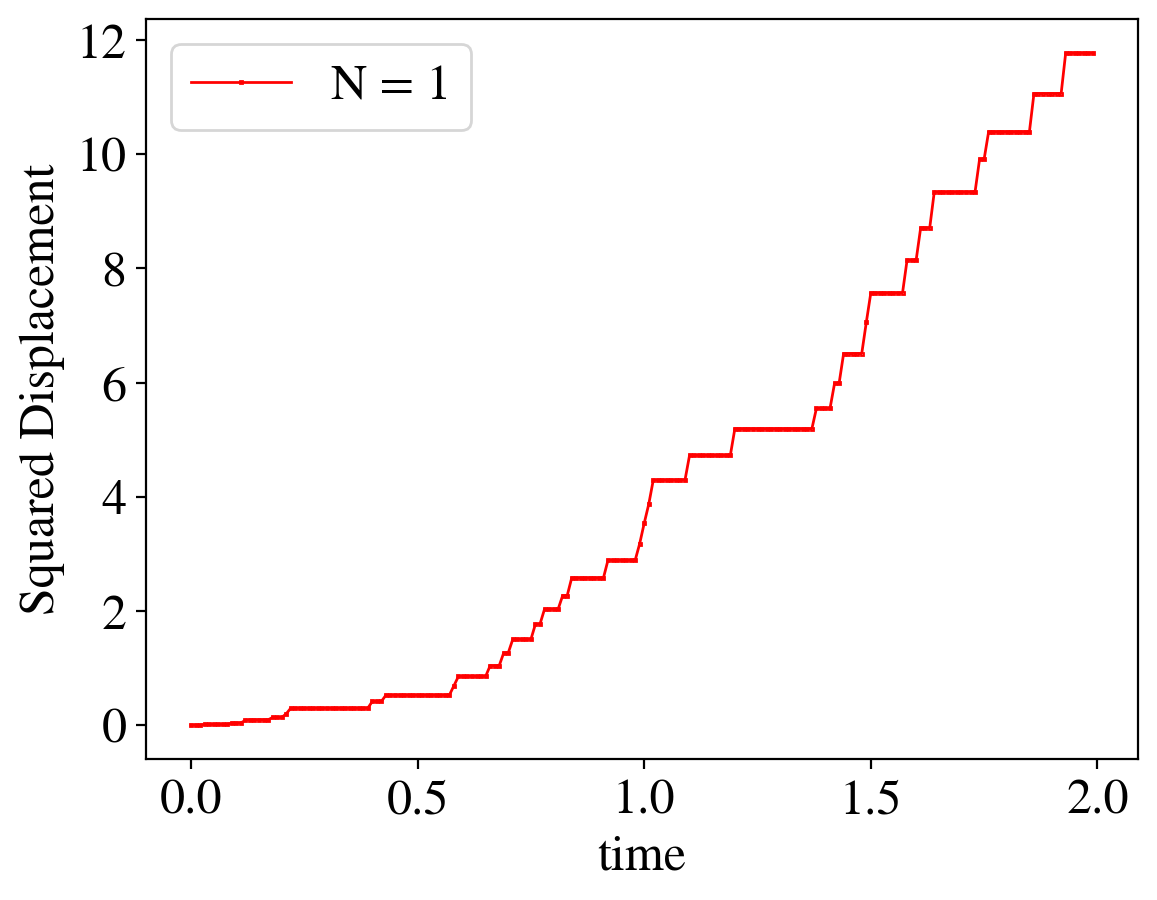

In [181]:
# def sqrd_displacement_calculator(time,x_plot,y_plot):
#     """
#     time = time array
#     x_plot = x plot array
#     y_plot = yaxis array
#     save_file_name = str w/ the file path and name
    
#     Return: the path+name of the output file; column 1 is time and colum 2 - msd
    
#     """
#     sd=0
    
#     sd_time = [] 

#     for i in range(len(x_plot)):
#         dx=x_plot[i]-x_plot[0]
#         dy=y_plot[i]-y_plot[0]
#         sd=dx*dx + dy*dy
#         sd=sd*sd
#         sd_time.append(sd)
#         # with open(save_file_name, 'a') as lala:
#         #     lala.write(f'{time[i]} {msd}\n')
#     return sd_time

# time = np.arange(len(X[:,0]))
# sq_p = sqrd_displacement_calculator(time,X[:,0],Y[:,0])
datamsd=np.loadtxt('squared_disp.dat')
time = datamsd[:,0]
sq_p = datamsd[:,1]
fig,ax = plt.subplots(dpi=200)

ax.plot(time,sq_p, lw=0.99, marker='s', mfc ='none', color='red',markersize=1, label='N = 1')
ax.set_xlabel('time')
ax.set_ylabel('Squared Displacement')
ax.legend()
# ax.loglog()
# ax.set_ylim((0,2.5))

plt.show()

In [48]:
X.shape

(100, 1)

0.05002116050000003

In [59]:
len(X[:,0])

100